<a href="https://colab.research.google.com/github/Yeehui13/Machine-Learning/blob/main/Machine_Learning_Lim_Yee_Hui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
from sklearn import linear_model
plt.style.use("seaborn")
mpl.rcParams["font.family"] = "serif"
%config InlineBackend.figure_format = "svg"

<ipython-input-11-902a4246aab7>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2 (2).csv


In [ ]:
import pandas as pd
import io

In [ ]:
df = pd.read_csv(io.StringIO(uploaded["FuelConsumptionCo2.csv"].decode("utf-8")), header=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [ ]:
#let's selct some feature to explore more
df = df[["ENGINESIZE","CO2EMISSIONS"]]

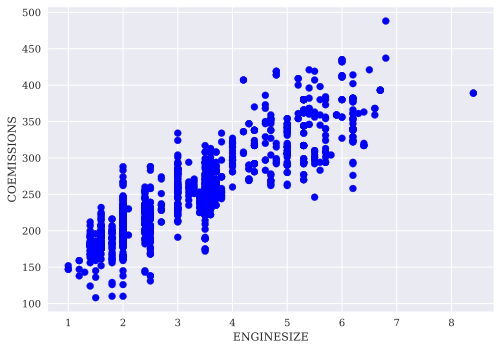

In [ ]:
#ENGINESIZE VS COEMISSION
plt.scatter(df["ENGINESIZE"], df["CO2EMISSIONS"], color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("COEMISSIONS")
plt.show()

In [ ]:
#generating and testing data from our data
#we are using 80% data for training
train = df[:(int((len(df)*0.8)))]
test = df[(int((len(df)*0.8))):]

In [ ]:
#modelling
#using sklearn package to model data
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x,train_y)

#the coefficient:
print("coefficients : ",regr.coef_)
print("Intercept : ",regr.intercept_)



coefficients :  [[38.79512384]]
Intercept :  [127.16989951]


Text(0, 0.5, 'Emissions')

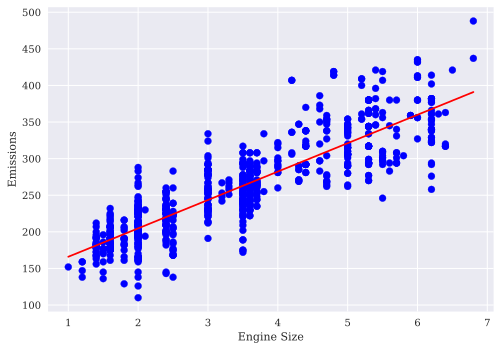

In [ ]:
#plotting the regression line:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, 'r')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")


In [ ]:
#predicting values:
#function for predicting future values:
def get_regression_prediction(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

In [ ]:
#checking various accuracy
from sklearn.metrics import r2_score

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" %np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 20.60
Mean sum of squares (MSE): 746.45
R2-score: 0.71
